Computes relative vorticity

In [1]:
import xarray as xr
import cmocean
from xnemogcm import open_nemo_and_domain_cfg, open_nemo, open_domain_cfg, get_metrics
import xgcm

Load in data using xnemogcm

In [2]:
region = 'SO_JET'

directory = f'/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/{region}/'
nemo_files = [f'MINT_1d_00610101_00610130_ug_{region}.nc',
              f'MINT_1d_00610101_00610130_vg_{region}.nc']

mask_path = [directory + f'mesh_mask_exp16_{region}.nc']

In [21]:
mask = xr.open_dataset(mask_path[0])
mask

<xarray.Dataset>
Dimensions:       (y: 216, x: 238, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 5.034 15.32 25.96 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    tmask         (time_counter, nav_lev, y, x) float32 ...
    umask         (time_counter, nav_lev, y, x) float32 ...
    vmask         (time_counter, nav_lev, y, x) float32 ...
    fmask         (time_counter, nav_lev, y, x) float32 ...
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 ...
    e3vw_0        (time_counter, nav_lev, y, x) float64 ...
    gdept_1d      (time_counter, nav_lev, y, x) float64 ...
    gdepw_1d      (time_counter, nav_lev, y, x) float64 ...
    gdept_0       (time_counter, nav_lev, y, x) float64 ...
    gdepw_0       (time_counter, nav_lev, y, x) float64 ...
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  21/12/2025 08:05:25 +0000

In [14]:
directory = f'/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/'
nemo_files = [f'MINT_1d_00610101_00610130_ug.nc',
              f'MINT_1d_00610101_00610130_vg.nc']

mask_path = ['~/Python/AI4PEX/DINO/mesh_mask_exp16.nc']

In [3]:
nemo_paths = [directory + f for f in nemo_files]
nemo_paths
# ds = open_nemo_and_domain_cfg(nemo_files=nemo_paths,
#                               domcfg_files=mask_path)

domcfg = open_domain_cfg(files = mask_path)

# nemo = open_nemo(domcfg = domcfg, files = nemo_paths)

In [5]:
domcfg_surface = domcfg.isel(z_c=0, z_f=0)

In [4]:
dataU = xr.open_dataset(nemo_paths[0])
dataV = xr.open_dataset(nemo_paths[1])

In [ ]:
# merge datasets and domcfg
ds = xr.merge([dataU, dataV, domcfg_surface])

Subset dataset

In [15]:
ds_ss = ds.isel(t=0,z_c=0)
ds_ss

<xarray.Dataset>
Dimensions:       (y_c: 3183, x_f: 802, axis_nbounds: 2, y_f: 3183, x_c: 802,
                   z_f: 36)
Coordinates: (12/20)
    t             object 0070-06-02 00:00:00
    gphiu         (y_c, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    glamu         (y_c, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    time_instant  object dask.array<chunksize=(), meta=np.ndarray>
  * x_f           (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 798.5 799.5 800.5 801.5
  * y_c           (y_c) int64 0 1 2 3 4 5 6 ... 3177 3178 3179 3180 3181 3182
    ...            ...
    gdept_1d      float64 dask.array<chunksize=(), meta=np.ndarray>
    gdepw_1d      (z_f) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gdept_0       (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gdepw_0       (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
  * z_f           (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 31.5 32.5 33.5 34.5
    z_c           int64 0
Dimensions without coordinates: axis_nbounds
Data variables: (12/31)
    ug            (y_c, x_f) float64 dask.array<chunksize=(3183, 802), meta=np.ndarray>
    t_bounds      (axis_nbounds) object dask.array<chunksize=(2,), meta=np.ndarray>
    vg            (y_f, x_c) float64 dask.array<chunksize=(3183, 802), meta=np.ndarray>
    tmask         (y_c, x_c) int8 dask.array<chunksize=(135, 206), meta=np.ndarray>
    umask         (y_c, x_f) int8 dask.array<chunksize=(135, 206), meta=np.ndarray>
    vmask         (y_f, x_c) int8 dask.array<chunksize=(135, 206), meta=np.ndarray>
    ...            ...
    e3u_0         (y_c, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    e3v_0         (y_f, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    e3f_0         (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    e3w_0         (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3uw_0        (z_f, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3vw_0        (z_f, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
Attributes:
    name:         NEMO dataset
    description:  Ocean grid variables, set on the proper positions
    title:        Ocean grid variables
    CfgName:      DINO
    CfgIndex:     0
    Iperio:       1
    Jperio:       0
    NFold:        0
    NFtype:       -
    VertCoord:    zco
    IsfCav:       0
    TimeStamp:    21/12/2025 08:05:25 +0000

Set up xgcm grid

In [7]:
# set up the xgcm grid
grid = xgcm.Grid(domcfg, metrics=get_metrics(domcfg))

In [9]:
bd = {'boundary': 'extend'}

In [12]:
zeta = 1/(domcfg_surface.e1f*domcfg_surface.e2f) * \
            (grid.diff(dataV.vg*domcfg_surface.e2v, 'X', **bd) \
             - grid.diff(dataU.ug*domcfg_surface.e1u, 'Y', **bd)) * domcfg_surface.fmask

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [13]:
zeta

<xarray.DataArray (y_f: 216, x_f: 238, t: 30)>
dask.array<mul, shape=(216, 238, 30), dtype=float64, chunksize=(216, 238, 30), chunktype=numpy.ndarray>
Coordinates:
    glamf    (y_f, x_f) float64 dask.array<chunksize=(216, 238), meta=np.ndarray>
    gphif    (y_f, x_f) float64 dask.array<chunksize=(216, 238), meta=np.ndarray>
  * x_f      (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 233.5 234.5 235.5 236.5 237.5
  * y_f      (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 211.5 212.5 213.5 214.5 215.5
    z_f      float64 -0.5
    z_c      int64 0
Dimensions without coordinates: t

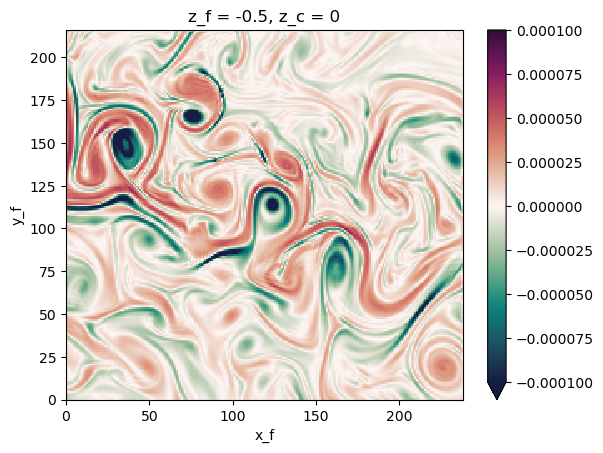

In [17]:
zeta.isel(t=0).plot(vmin=-1e-4, vmax=1e-4, cmap=cmocean.cm.curl)

In [22]:
ds_zeta = zeta.to_dataset(name='vor')
ds_zeta

<xarray.Dataset>
Dimensions:       (x_f: 802, y_f: 3183)
Coordinates:
    time_instant  object dask.array<chunksize=(), meta=np.ndarray>
    t             object 0062-03-02 00:00:00
  * x_f           (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 798.5 799.5 800.5 801.5
    gdept_1d      float64 dask.array<chunksize=(), meta=np.ndarray>
    z_c           int64 0
  * y_f           (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03
    glamf         (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gphif         (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
Data variables:
    vor           (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>

In [23]:
save_directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/'
ds_zeta.to_netcdf(save_directory + 'relative_vorticity_test.nc')